In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
%matplotlib inline

In [5]:
complaints = pd.read_csv('complaints_dec_2014.csv')

In [6]:
!head complaints_dec_2014.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1177167,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,
1177166,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,
1177165,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,
1177164,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,
1177163,Debt collection,,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhan

In [7]:
# !tail complaints_dec_2014.csv

In [8]:
# complaints.head(5)

In [9]:
# complaints['Product'].head

In [10]:
product_series = complaints.Product

In [11]:
product_series.head(10)

0    Debt collection
1    Debt collection
2    Debt collection
3    Debt collection
4    Debt collection
5    Debt collection
6        Credit card
7    Debt collection
8    Debt collection
9    Debt collection
Name: Product, dtype: object

In [12]:
# complaints.sort('Product', ascending=True)

In [13]:
product_count = complaints.Product.value_counts()

In [14]:
product_count


Mortgage                   3002
Debt collection            2942
Credit reporting           2113
Bank account or service    1136
Credit card                1100
Consumer loan               578
Student loan                340
Payday loan                 141
Money transfers             107
Prepaid card                 70
Other financial service      14
dtype: int64

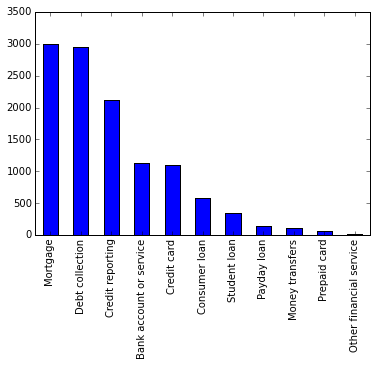

In [15]:
product_count.plot(kind = 'bar')

# df = pd.DataFrame(values, columns=['Type A', 'Type B'], index=['Index 1','Index 2'])
# df.columns.name = 'Type'
# df.index.name = 'Index'
# df.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Video streaming dropout by category')


We can see that consumer complaints about mortgage related issues and debt collection issues are the most frequently occuring.  However, every one of the products which have received the highest number of complaints are in the financial services industry.

In [16]:
company_series = complaints.Company

In [17]:
company_series.head(10)

0        Ad Astra Recovery Services Inc
1       Unique Management Services, Inc
2                      CL Holdings, LLC
3        Enhanced Recovery Company, LLC
4            Enhanced Acquisitions, LLC
5    Credit Systems International, Inc.
6                                  Amex
7                  Speedy Cash Holdings
8                            Afni, Inc.
9        Enhanced Recovery Company, LLC
Name: Company, dtype: object

In [18]:
company_count = complaints.Company.value_counts()
print(company_count)

Bank of America                           766
Equifax                                   737
Experian                                  675
TransUnion                                604
Wells Fargo                               598
JPMorgan Chase                            545
Ocwen                                     408
Citibank                                  403
Nationstar Mortgage                       357
Capital One                               252
U.S. Bancorp                              203
Navient                                   177
GE Capital Retail                         175
Green Tree Servicing, LLC                 174
Encore Capital Group                      156
Amex                                      130
PNC Bank                                  128
Select Portfolio Servicing, Inc           117
TD Bank                                   109
HSBC                                      102
Portfolio Recovery Associates, Inc.        98
Enhanced Recovery Company, LLC    

In [19]:
company_count.head(10)

Bank of America        766
Equifax                737
Experian               675
TransUnion             604
Wells Fargo            598
JPMorgan Chase         545
Ocwen                  408
Citibank               403
Nationstar Mortgage    357
Capital One            252
dtype: int64

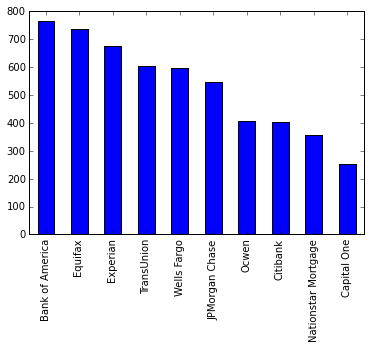

In [20]:
company_count.head(10).plot(kind = 'bar')

There appears to be the highest rate of consumer dissatisfaction within the financial services industry, particularly lenders and credit bureaus.

In [27]:
company_series = complaints['Company response'].value_counts()
print(company_series)

Closed with explanation            8185
Closed with non-monetary relief    1253
In progress                        1056
Closed with monetary relief         643
Closed                              239
Untimely response                   167
dtype: int64


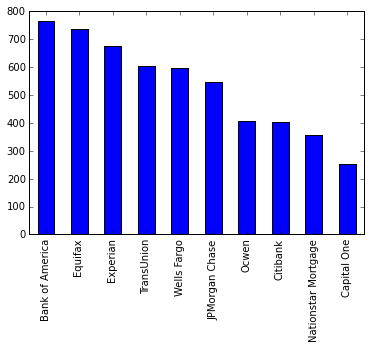

In [28]:
company_count.head(10).plot(kind = 'bar')

In [ ]:
company_count.plot